In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from datasets import load_dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [64]:
#Part-I: Naive Bayes Classifier

In [65]:
# Task 2: Spam Detection using MultinomialNB
# ● Load a text dataset (e.g., SMS Spam Collection or any public text dataset).
# ● Preprocess using CountVectorizer or TfidfVectorizer.
# ● Train a MultinomialNB classifier.
# ● Evaluate:
# ○ Accuracy
# ○ Precision
# ○ Recall
# ○ Confusion Matrix

In [66]:
#A. Load Dataset
data = load_dataset("sms_spam")
df = data['train'].to_pandas()
print(df.head())

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0


In [67]:
# B. Preprocess using CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(df['sms'])  # <-- fix here
y = df['label']

In [68]:
# C. Train a MultinomialNB classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [69]:
# D. Predict and Evaluate
#prediction
y_pred = model.predict(X_test)

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9847533632286996
Precision: 0.9390243902439024
Recall: 0.9565217391304348
Confusion Matrix:
 [[944  10]
 [  7 154]]


In [57]:
# Task 3: GaussianNB with Iris or Wine Dataset
# ● Train a GaussianNB classifier on a numeric dataset.
# ● Split data into train/test sets.
# ● Evaluate model performance.
# ● Compare with Logistic Regression or Decision Tree briefly.

In [70]:
# A. Load Iris Dataset
data = load_iris(as_frame=True)
X = data.data
y = data.target

In [71]:
# B. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#C. Evaluate Model Performance
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred_gauss = gauss.predict(X_test)

print("GaussianNB Performance:\n", classification_report(y_test, y_pred_gauss))

GaussianNB Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
#D. Comparision with Logistic Regression
log= LogisticRegression(max_iter=200)
log.fit(X_train, y_train)
y_pred_log= log.predict(X_test)

print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [76]:
#Part-II: Decision Trees

In [77]:
# Task 5: Decision Tree on Titanic Dataset
# ● Load Titanic dataset (or use a similar dataset).
# ● Preprocess (handle missing values, encode categorical variables).
# ● Train a DecisionTreeClassifier.
# ● Visualize the decision tree using plot_tree.
# ● Evaluate the model using accuracy and confusion matrix.

In [78]:
#A. Load the Dataset
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [79]:
#B. Preprocess the Model

# Select features
feature = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[feature + ['survived']]

# Drop rows with missing required categorical values
df = df.dropna(subset=['sex', 'age', 'embarked'])

# Encode categorical variables
label_sex = LabelEncoder()
label_embarked = LabelEncoder()
df['sex'] = label_sex.fit_transform(df['sex'])
df['embarked'] = label_embarked.fit_transform(df['embarked'])

# Fill missing numerical values 
df['age'] = df['age'].fillna(df['age'].median())

# Define X and y
X = df[feature]
y = df['survived']


In [80]:
#C. Train a DecisionTreeClassifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

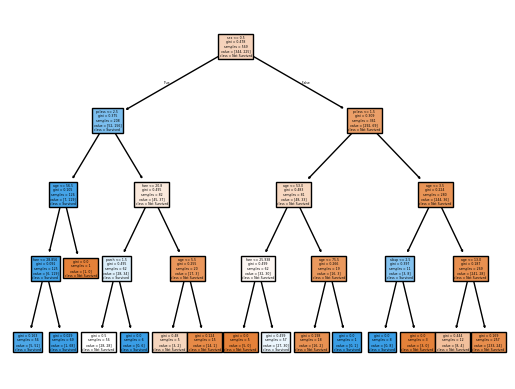

In [81]:
#D. Visualize using Plot_tree
plot_tree(clf, feature_names=feature, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [82]:
#E. Evaluate the model using accuracy and confusion matrix.
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7062937062937062
Confusion Matrix:
 [[67 13]
 [29 34]]


In [32]:
# Task 6: Model Tuning
# ● Use parameters like:
# ○ max_depth
# ○ min_samples_split
# ● Show how performance changes.
# ● Plot training vs testing accuracy to visualize overfitting.


In [83]:
max_depths = range(1, 21)
train_acc=[]
test_acc=[]

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Accuracy on training and test sets
    train=accuracy_score(y_train, clf.predict(X_train))
    test=accuracy_score(y_test, clf.predict(X_test))
    
    train_acc.append(train)
    test_acc.append(test)

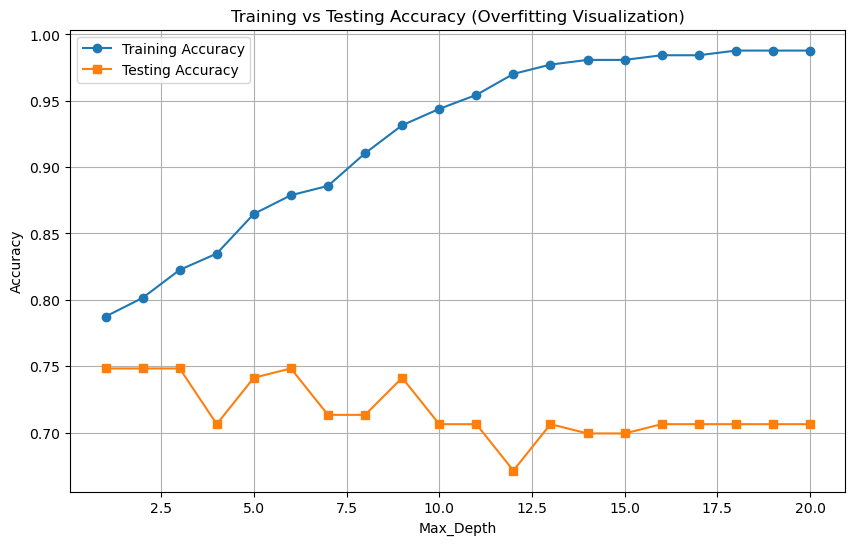

In [84]:
plt.figure(figsize=(10,6))
plt.plot(max_depths, train_acc, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_acc, label='Testing Accuracy', marker='s')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (Overfitting Visualization)')
plt.legend()
plt.grid()
plt.show()

In [35]:
#min_split

In [85]:
splits = range(2, 21)
train_acc_split = []
test_acc_split = []

for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc_split.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc_split.append(accuracy_score(y_test, clf.predict(X_test)))


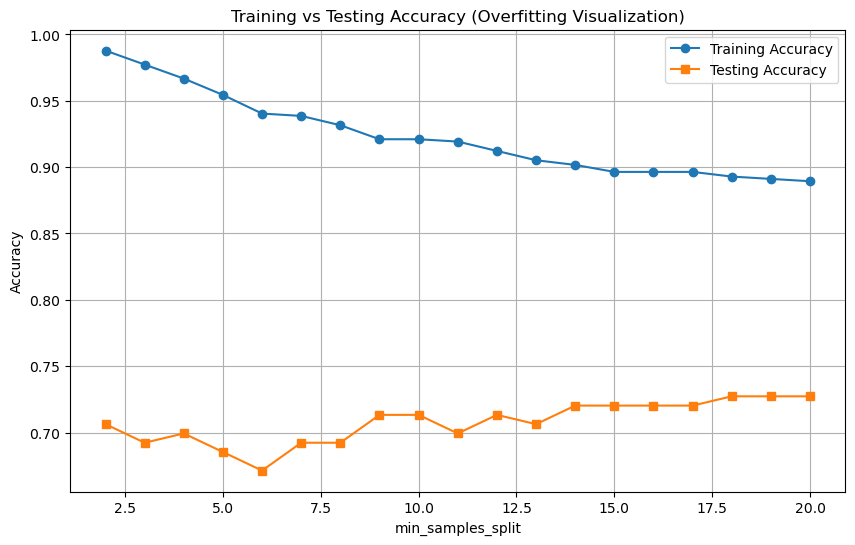

In [87]:
plt.figure(figsize=(10,6))
plt.plot(splits, train_acc_split, label='Training Accuracy', marker='o')
plt.plot(splits, test_acc_split, label='Testing Accuracy', marker='s')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (Overfitting Visualization)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Part-III: Ensemble Learning – Bagging, Boosting, Random Forest


In [38]:
# Task 8: Random Forest vs Decision Tree
# ● Train a RandomForestClassifier on the same dataset used for Task 5.
# ● Compare accuracy, precision, and recall with the standalone decision tree.
# ● Plot feature importances.

In [88]:
#A Training the Titanic Dataset( preprocessed in task5) 

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [91]:
#B. Comparision
def evaluate(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
print("Decision Tree Performance")
evaluate(y_test, y_pred_dt)
print()
print("Random Forest Performance")
evaluate(y_test, y_pred_rf)


Decision Tree Performance
Accuracy : 0.7062937062937062
Precision: 0.6909090909090909
Recall   : 0.6031746031746031

Random Forest Performance
Accuracy : 0.7902097902097902
Precision: 0.7796610169491526
Recall   : 0.7301587301587301


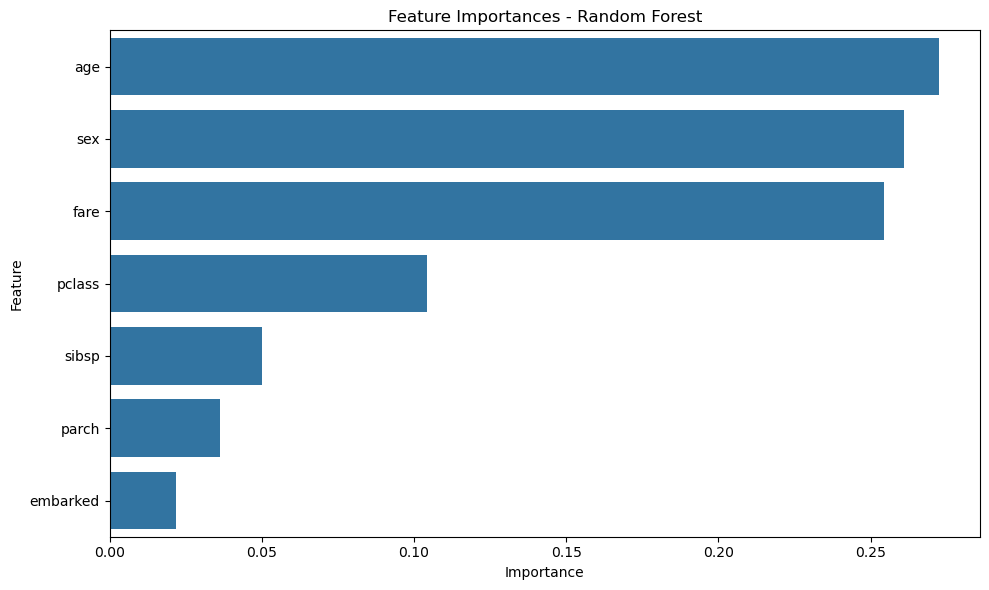

In [92]:
#C. Feature Importances

# Feature importances from Random Forest
importances = rf_clf.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for easy plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [44]:
# Task 9: AdaBoost or Gradient Boosting
# ● Train an AdaBoostClassifier or GradientBoostingClassifier.
# ● Use a suitable dataset.
# ● Compare it with Random Forest and Decision Tree in terms of:
# ○ Accuracy
# ○ F1-score
# ○ Training time (optional)

In [94]:
def train(model):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"Train Time: {train_time:.4f} seconds")
    return acc, f1, train_time


In [95]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
print("Decision Tree")
train(dt_clf)
print()

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest")
train(rf_clf)
print()

# AdaBoost
ab_clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)
print("AdaBoost")
train(ab_clf)
print()

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
print("Gradient Boosting")
train(gb_clf)


Decision Tree
Accuracy : 0.7063
F1-Score : 0.6441
Train Time: 0.0138 seconds

Random Forest
Accuracy : 0.7902
F1-Score : 0.7541
Train Time: 0.4226 seconds

AdaBoost
Accuracy : 0.8392
F1-Score : 0.8034
Train Time: 0.2967 seconds

Gradient Boosting
Accuracy : 0.7692
F1-Score : 0.7179
Train Time: 0.3956 seconds


(0.7692307692307693, 0.717948717948718, 0.39557862281799316)

In [96]:
print("END!!!")

END!!!
